In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
data = np.loadtxt('HD14818.txt')
x = data[:, 0]
y = data[:, 1]
flux=y*(u.erg / (u.cm ** 2 * u.s * u.AA))
spectral_axis = x*u.AA
spectrum = Spectrum1D(flux, spectral_axis)
from matplotlib import pyplot as plt
plt.plot(spectrum.spectral_axis, spectrum.flux) 
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
plt.grid(True) 

In [2]:
flux

<Quantity [3.8913039e-12, 4.5764759e-12, 4.8846040e-12, ..., 4.0744259e-11,
           4.0247850e-11, 2.0624199e-11] erg / (Angstrom cm2 s)>

In [3]:
spectral_axis

<Quantity [1150.581, 1152.257, 1153.934, ..., 3343.572, 3346.241, 3348.91 ] Angstrom>

In [4]:
#flux=flux.to(u.erg / (u.cm ** 2 * u.s * u.micron))

In [5]:
#spectral_axis=spectral_axis.to(u.micron)  


In [6]:
spectral_axis

<Quantity [1150.581, 1152.257, 1153.934, ..., 3343.572, 3346.241, 3348.91 ] Angstrom>

In [7]:
flux

<Quantity [3.8913039e-12, 4.5764759e-12, 4.8846040e-12, ..., 4.0744259e-11,
           4.0247850e-11, 2.0624199e-11] erg / (Angstrom cm2 s)>

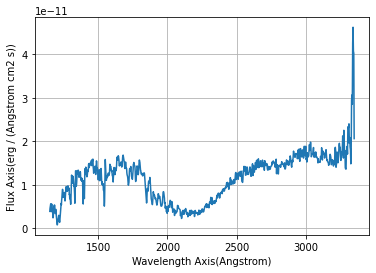

In [8]:
from astropy import units as u
#spectral_axis.to(u.micron)  
#flux.to(u.erg / (u.cm ** 2 * u.s * u.micron))
spectrum = Spectrum1D(flux, spectral_axis)
from matplotlib import pyplot as plt
plt.plot(spectrum.spectral_axis, spectrum.flux) 
plt.xlabel('Wavelength Axis({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
plt.grid(True) 

In [25]:
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler
new_disp_grid = np.arange(1150, 3348, 5) * u.AA

In [26]:
#new_disp_grid=new_disp_grid.to(u.micron)


In [27]:
new_disp_grid

<Quantity [1150., 1155., 1160., 1165., 1170., 1175., 1180., 1185., 1190.,
           1195., 1200., 1205., 1210., 1215., 1220., 1225., 1230., 1235.,
           1240., 1245., 1250., 1255., 1260., 1265., 1270., 1275., 1280.,
           1285., 1290., 1295., 1300., 1305., 1310., 1315., 1320., 1325.,
           1330., 1335., 1340., 1345., 1350., 1355., 1360., 1365., 1370.,
           1375., 1380., 1385., 1390., 1395., 1400., 1405., 1410., 1415.,
           1420., 1425., 1430., 1435., 1440., 1445., 1450., 1455., 1460.,
           1465., 1470., 1475., 1480., 1485., 1490., 1495., 1500., 1505.,
           1510., 1515., 1520., 1525., 1530., 1535., 1540., 1545., 1550.,
           1555., 1560., 1565., 1570., 1575., 1580., 1585., 1590., 1595.,
           1600., 1605., 1610., 1615., 1620., 1625., 1630., 1635., 1640.,
           1645., 1650., 1655., 1660., 1665., 1670., 1675., 1680., 1685.,
           1690., 1695., 1700., 1705., 1710., 1715., 1720., 1725., 1730.,
           1735., 1740., 1745., 1750.,

/home/ram/snap/jupyter/common/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


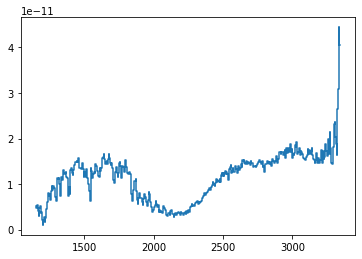

In [28]:
fluxcon = FluxConservingResampler()
new_spec_fluxcon = fluxcon(spectrum, new_disp_grid) 
f, ax = plt.subplots()  
ax.step(new_spec_fluxcon.spectral_axis, new_spec_fluxcon.flux) 


In [30]:
print(new_spec_fluxcon.spectral_axis)

[1150. 1155. 1160. 1165. 1170. 1175. 1180. 1185. 1190. 1195. 1200. 1205.
 1210. 1215. 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255. 1260. 1265.
 1270. 1275. 1280. 1285. 1290. 1295. 1300. 1305. 1310. 1315. 1320. 1325.
 1330. 1335. 1340. 1345. 1350. 1355. 1360. 1365. 1370. 1375. 1380. 1385.
 1390. 1395. 1400. 1405. 1410. 1415. 1420. 1425. 1430. 1435. 1440. 1445.
 1450. 1455. 1460. 1465. 1470. 1475. 1480. 1485. 1490. 1495. 1500. 1505.
 1510. 1515. 1520. 1525. 1530. 1535. 1540. 1545. 1550. 1555. 1560. 1565.
 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615. 1620. 1625.
 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675. 1680. 1685.
 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735. 1740. 1745.
 1750. 1755. 1760. 1765. 1770. 1775. 1780. 1785. 1790. 1795. 1800. 1805.
 1810. 1815. 1820. 1825. 1830. 1835. 1840. 1845. 1850. 1855. 1860. 1865.
 1870. 1875. 1880. 1885. 1890. 1895. 1900. 1905. 1910. 1915. 1920. 1925.
 1930. 1935. 1940. 1945. 1950. 1955. 1960. 1965. 19

In [31]:
new_spec_fluxcon.flux

<Quantity [           nan, 5.06488961e-12, 4.64372015e-12, 5.33435182e-12,
           4.06490266e-12, 2.92856980e-12, 4.68946302e-12, 5.09289785e-12,
           3.63557001e-12, 3.95967606e-12, 2.03672963e-12, 1.01287208e-12,
           1.95380851e-12, 2.78368732e-12, 1.75495106e-12, 2.45971823e-12,
           4.45251044e-12, 5.98229683e-12, 7.97449121e-12, 8.10021015e-12,
           7.46680657e-12, 7.84598567e-12, 6.51552601e-12, 8.41708140e-12,
           9.46452876e-12, 8.67342433e-12, 9.47651289e-12, 9.13035539e-12,
           8.60419078e-12, 7.14613865e-12, 6.17147988e-12, 8.82574683e-12,
           1.13458150e-11, 1.10266984e-11, 1.14205569e-11, 9.92221350e-12,
           7.46992095e-12, 9.93031245e-12, 1.14758062e-11, 1.07874735e-11,
           1.29868231e-11, 1.31267054e-11, 1.22888314e-11, 1.23967607e-11,
           1.26652251e-11, 1.14693231e-11, 1.12655918e-11, 1.10473800e-11,
           7.33641788e-12, 9.43689661e-12, 7.83932222e-12, 1.30661705e-11,
           1.35930577e-11

In [32]:
x=np.array(new_spec_fluxcon.spectral_axis)

In [33]:
y=np.array(new_spec_fluxcon.flux)

In [34]:
import numpy as np
np.savetxt('14818_20_y.txt', y, delimiter=',')

In [37]:
import numpy as np
data = np.loadtxt('LWR14722LL_t1.txt')
x = data[:, 0]
y = data[:, 1]

In [38]:
from scipy.interpolate import interp1d
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

In [41]:
xnew=np.arange(start=1600, stop=3500, step=1)